# CH02-03: NLP 核心任務介紹

**課程目標:**
- 掌握 NLP 的四大核心任務分類
- 理解序列標註、文本分類、Seq2Seq、問答系統
- 學會任務的統一建模框架
- 了解評估指標 (Precision/Recall/F1/BLEU/ROUGE)

**學習時間:** 約 120 分鐘

**前置知識:**
- Python 基礎
- 基礎 NLP 概念
- 機器學習基本概念

---

## 📚 目錄

1. [NLP 任務分類總覽](#1)
2. [序列標註 (Sequence Labeling)](#2)
3. [文本分類 (Text Classification)](#3)
4. [序列到序列 (Seq2Seq)](#4)
5. [問答系統 (Question Answering)](#5)
6. [統一建模框架](#6)
7. [評估指標實戰](#7)
8. [實戰練習](#8)

---

In [1]:
# 環境設定與套件導入
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from typing import List, Dict, Tuple
import warnings
warnings.filterwarnings('ignore')

# 設定中文顯示
plt.rcParams['font.sans-serif'] = ['Microsoft JhengHei', 'SimHei', 'Arial Unicode MS']
plt.rcParams['axes.unicode_minus'] = False

# 設定顯示風格
sns.set_style('whitegrid')
sns.set_palette('husl')

print("✅ 環境設定完成")
print(f"NumPy 版本: {np.__version__}")

✅ 環境設定完成
NumPy 版本: 1.23.5


<a id="1"></a>
## 1. NLP 任務分類總覽

### 1.1 四大核心任務

NLP 任務可以按照輸入輸出特性分為四大類:

```
┌─────────────────────────────────────────────────────────┐
│                    NLP 核心任務分類                      │
└─────────────────────────────────────────────────────────┘
              │
              ├─── 1. 序列標註 (Sequence Labeling)
              │     ├─ 命名實體識別 (NER)
              │     ├─ 詞性標註 (POS Tagging)
              │     └─ 中文分詞 (Word Segmentation)
              │
              ├─── 2. 文本分類 (Text Classification)
              │     ├─ 情感分析 (Sentiment Analysis)
              │     ├─ 主題分類 (Topic Classification)
              │     └─ 垃圾郵件檢測 (Spam Detection)
              │
              ├─── 3. 序列到序列 (Seq2Seq)
              │     ├─ 機器翻譯 (Translation)
              │     ├─ 文本摘要 (Summarization)
              │     └─ 文本改寫 (Paraphrasing)
              │
              └─── 4. 問答系統 (Question Answering)
                    ├─ 抽取式問答 (Extractive QA)
                    └─ 生成式問答 (Generative QA)
```

---

### 1.2 任務對比總覽

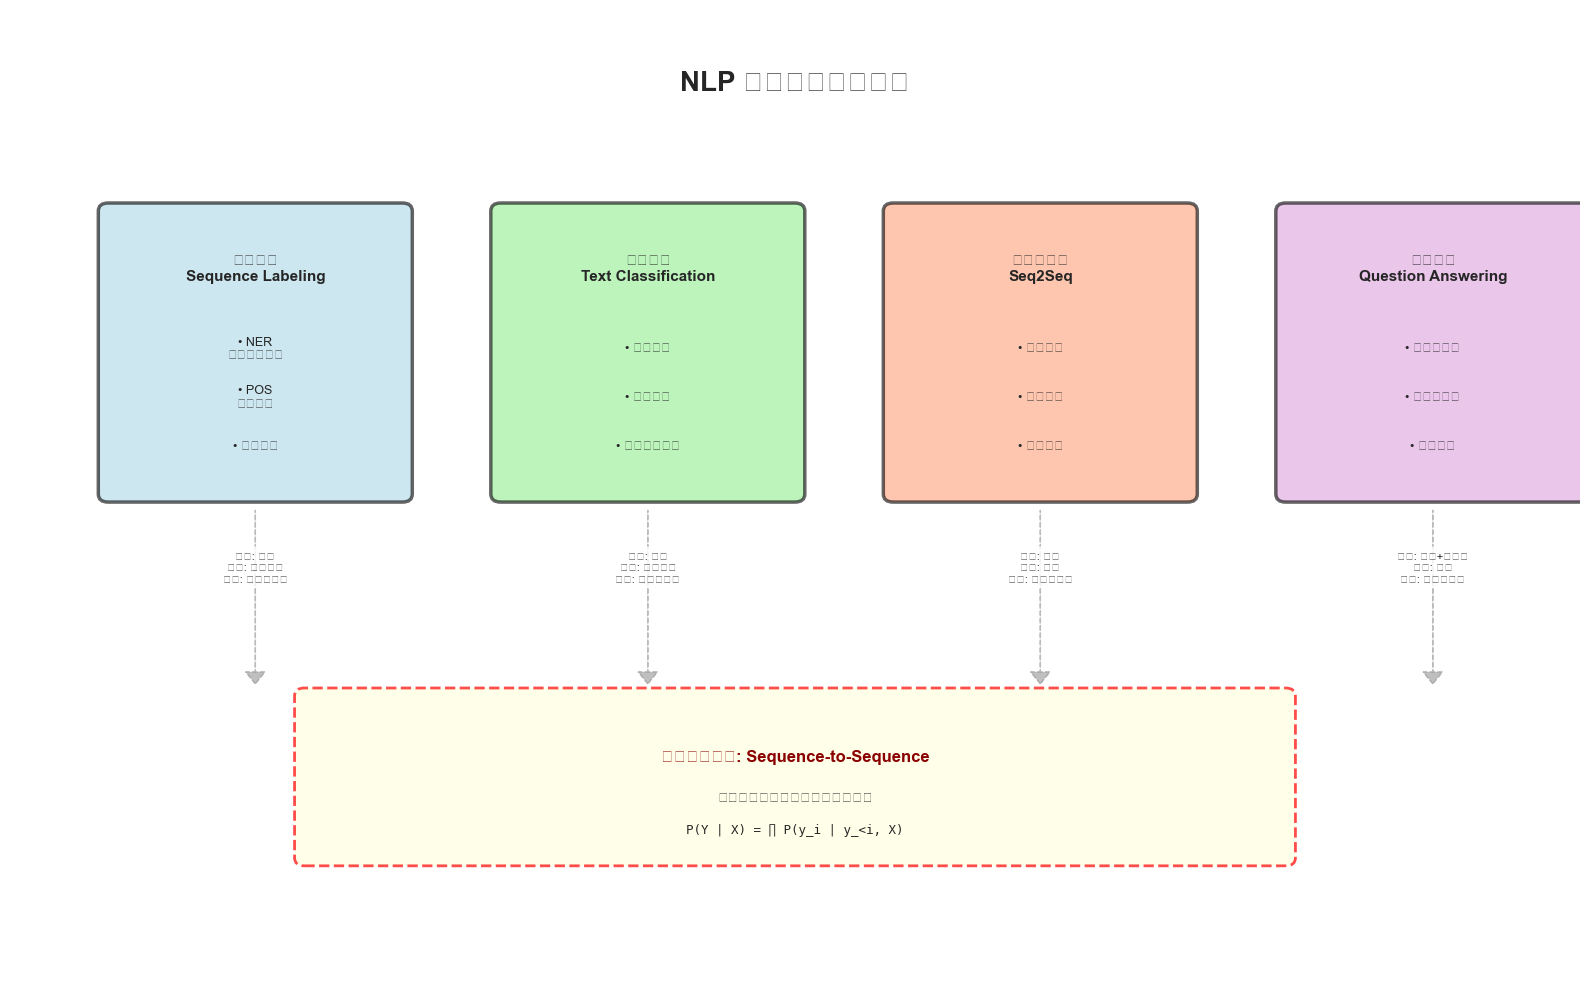


🎯 核心洞察:
  1. 所有 NLP 任務本質上都是序列建模問題
  2. 不同任務的差異在於輸入輸出的格式與約束
  3. Transformer 等模型可以統一處理這些任務


In [2]:
# 視覺化: NLP 任務分類架構圖
import matplotlib.patches as mpatches

fig, ax = plt.subplots(figsize=(16, 10))
ax.set_xlim(0, 16)
ax.set_ylim(0, 12)
ax.axis('off')

# 標題
ax.text(8, 11, 'NLP 核心任務分類架構', ha='center', fontsize=20, fontweight='bold')

# 四大任務區塊
tasks = [
    {
        'name': '序列標註\nSequence Labeling',
        'x': 1, 'y': 6,
        'color': 'lightblue',
        'subtasks': ['NER\n命名實體識別', 'POS\n詞性標註', '中文分詞']
    },
    {
        'name': '文本分類\nText Classification',
        'x': 5, 'y': 6,
        'color': 'lightgreen',
        'subtasks': ['情感分析', '主題分類', '垃圾郵件檢測']
    },
    {
        'name': '序列到序列\nSeq2Seq',
        'x': 9, 'y': 6,
        'color': 'lightsalmon',
        'subtasks': ['機器翻譯', '文本摘要', '文本改寫']
    },
    {
        'name': '問答系統\nQuestion Answering',
        'x': 13, 'y': 6,
        'color': 'plum',
        'subtasks': ['抽取式問答', '生成式問答', '對話系統']
    }
]

for task in tasks:
    # 主任務區塊
    rect = mpatches.FancyBboxPatch(
        (task['x'], task['y']), 3, 3.5,
        boxstyle="round,pad=0.1",
        linewidth=2.5,
        edgecolor='black',
        facecolor=task['color'],
        alpha=0.6
    )
    ax.add_patch(rect)
    ax.text(task['x'] + 1.5, task['y'] + 2.8, task['name'],
            ha='center', va='center', fontsize=11, fontweight='bold')
    
    # 子任務
    for i, subtask in enumerate(task['subtasks']):
        y_pos = task['y'] + 1.8 - i * 0.6
        ax.text(task['x'] + 1.5, y_pos, f'• {subtask}',
                ha='center', va='center', fontsize=9)

# 輸入輸出特徵說明
io_features = [
    {'x': 2.5, 'text': '輸入: 序列\n輸出: 標籤序列\n難度: ★★★☆☆'},
    {'x': 6.5, 'text': '輸入: 文本\n輸出: 類別標籤\n難度: ★★☆☆☆'},
    {'x': 10.5, 'text': '輸入: 序列\n輸出: 序列\n難度: ★★★★☆'},
    {'x': 14.5, 'text': '輸入: 問題+上下文\n輸出: 答案\n難度: ★★★★★'}
]

for feat in io_features:
    ax.text(feat['x'], 5.3, feat['text'],
            ha='center', va='top', fontsize=8,
            bbox=dict(boxstyle='round', facecolor='white', alpha=0.8))

# 統一框架說明
framework_rect = mpatches.FancyBboxPatch(
    (3, 1.5), 10, 2,
    boxstyle="round,pad=0.1",
    linewidth=2,
    edgecolor='red',
    facecolor='lightyellow',
    alpha=0.7,
    linestyle='--'
)
ax.add_patch(framework_rect)
ax.text(8, 2.7, '統一建模框架: Sequence-to-Sequence',
        ha='center', fontsize=12, fontweight='bold', color='darkred')
ax.text(8, 2.2, '所有任務本質上都是序列建模問題',
        ha='center', fontsize=10, style='italic')
ax.text(8, 1.8, 'P(Y | X) = ∏ P(y_i | y_<i, X)',
        ha='center', fontsize=9, family='monospace')

# 連接線
for i, task in enumerate(tasks):
    ax.arrow(task['x'] + 1.5, 5.8, 0, -2, head_width=0.2, head_length=0.15,
             fc='gray', ec='gray', linestyle='--', alpha=0.5)

plt.tight_layout()
plt.show()

print("\n🎯 核心洞察:")
print("  1. 所有 NLP 任務本質上都是序列建模問題")
print("  2. 不同任務的差異在於輸入輸出的格式與約束")
print("  3. Transformer 等模型可以統一處理這些任務")

### 1.3 任務對比表

| 任務類型 | 輸入 | 輸出 | 輸出長度 | 代表模型 | 難度 | 典型應用 |
|:--------|:-----|:-----|:---------|:---------|:-----|:---------|
| **序列標註** | 序列 | 標籤序列 | m = n | BiLSTM-CRF, BERT-NER | ★★★☆☆ | 資訊抽取、知識圖譜 |
| **文本分類** | 文本 | 類別標籤 | m = 1 | TextCNN, BERT | ★★☆☆☆ | 情感分析、內容審核 |
| **序列轉序列** | 序列 | 序列 | m ≠ n | Transformer, T5 | ★★★★☆ | 翻譯、摘要 |
| **問答系統** | 問題+上下文 | 答案 | 不定 | BERT-QA, GPT | ★★★★★ | 智能客服、搜尋 |
| **文本生成** | 提示詞 | 文本 | 不定 | GPT, ChatGPT | ★★★★★ | 對話、創作 |

---

<a id="2"></a>
## 2. 序列標註 (Sequence Labeling)

### 2.1 定義與特點

**定義:** 為輸入序列的每個元素分配一個標籤

**數學表示:**
```
輸入: X = [x_1, x_2, ..., x_n]
輸出: Y = [y_1, y_2, ..., y_n]
其中: len(X) = len(Y)
```

**關鍵特徵:**
- 輸入輸出長度相同
- 標籤之間存在依賴關係 (序列建模)
- 需要考慮上下文訊息

---

### 2.2 命名實體識別 (NER)

**目標:** 識別文本中的實體 (人名、地名、組織名等)

**BIO 標註格式:**
- **B** (Begin): 實體開始
- **I** (Inside): 實體內部
- **O** (Outside): 非實體

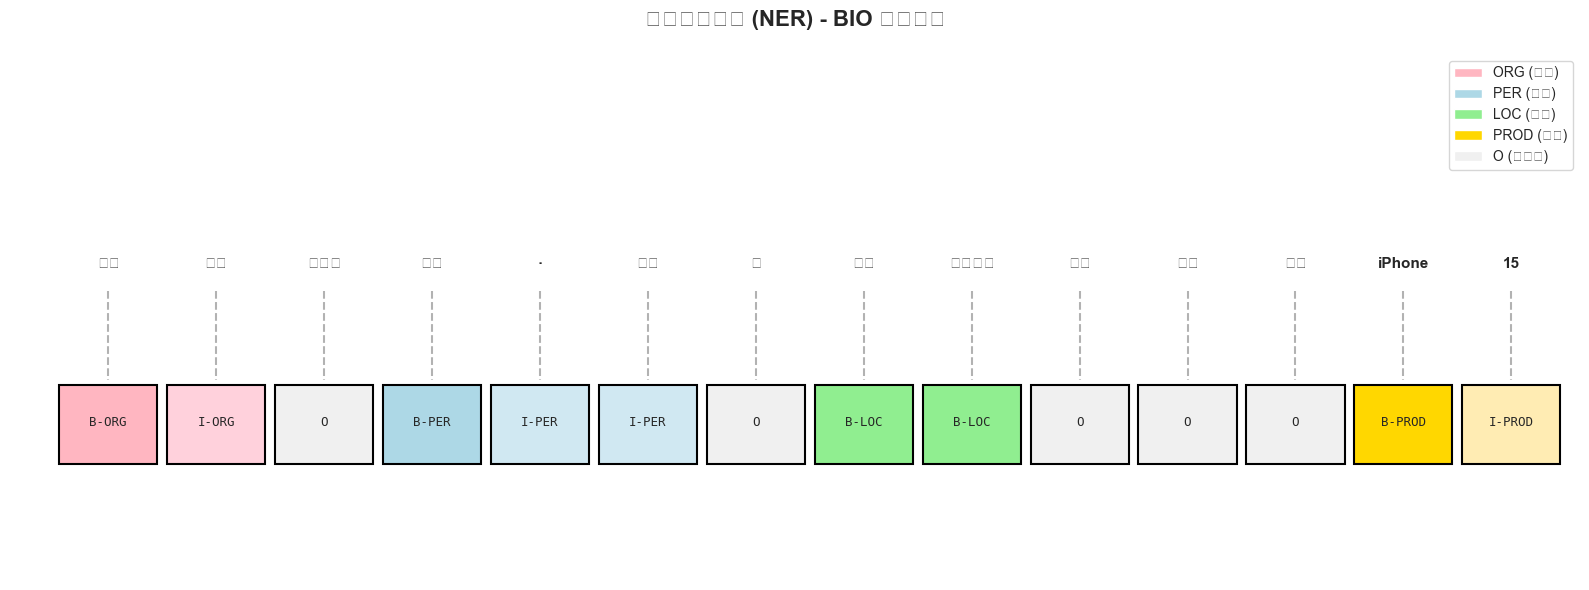


📌 BIO 標註說明:
  • B-XXX: 實體開始位置
  • I-XXX: 實體內部位置
  • O: 非實體部分

🔍 識別到的實體:
  - 蘋果公司 [ORG]
  - 提姆·庫克 [PER]
  - 加州, 庫比蒂諾 [LOC]
  - iPhone 15 [PROD]


In [3]:
# 2.2.1 NER 示例: BIO 標註

# 示例句子
sentence = "蘋果公司執行長提姆·庫克在加州庫比蒂諾總部宣布推出 iPhone 15"
tokens = ["蘋果", "公司", "執行長", "提姆", "·", "庫克", "在", "加州", 
          "庫比蒂諾", "總部", "宣布", "推出", "iPhone", "15"]
labels = ["B-ORG", "I-ORG", "O", "B-PER", "I-PER", "I-PER", "O", "B-LOC", 
          "B-LOC", "O", "O", "O", "B-PROD", "I-PROD"]

# 視覺化 NER 標註
fig, ax = plt.subplots(figsize=(16, 6))
ax.axis('off')

# 定義顏色映射
color_map = {
    'B-ORG': '#FFB6C1', 'I-ORG': '#FFD1DC',
    'B-PER': '#ADD8E6', 'I-PER': '#D0E8F2',
    'B-LOC': '#90EE90', 'I-LOC': '#C1FFC1',
    'B-PROD': '#FFD700', 'I-PROD': '#FFECB3',
    'O': '#F0F0F0'
}

# 繪製詞與標籤
x_offset = 0.5
y_token = 0.6
y_label = 0.3

for i, (token, label) in enumerate(zip(tokens, labels)):
    # 繪製標籤背景
    rect = mpatches.Rectangle((x_offset + i * 1.1, y_label - 0.08), 1, 0.15,
                               facecolor=color_map.get(label, '#F0F0F0'),
                               edgecolor='black', linewidth=1.5)
    ax.add_patch(rect)
    
    # 繪製詞
    ax.text(x_offset + i * 1.1 + 0.5, y_token, token,
            ha='center', va='center', fontsize=11, fontweight='bold')
    
    # 繪製標籤
    ax.text(x_offset + i * 1.1 + 0.5, y_label, label,
            ha='center', va='center', fontsize=9, family='monospace')
    
    # 連接線
    ax.plot([x_offset + i * 1.1 + 0.5, x_offset + i * 1.1 + 0.5],
            [y_token - 0.05, y_label + 0.08], 'k--', alpha=0.3)

# 圖例
legend_elements = [
    mpatches.Patch(facecolor='#FFB6C1', label='ORG (組織)'),
    mpatches.Patch(facecolor='#ADD8E6', label='PER (人名)'),
    mpatches.Patch(facecolor='#90EE90', label='LOC (地點)'),
    mpatches.Patch(facecolor='#FFD700', label='PROD (產品)'),
    mpatches.Patch(facecolor='#F0F0F0', label='O (非實體)')
]
ax.legend(handles=legend_elements, loc='upper right', fontsize=10)

ax.set_xlim(0, 16)
ax.set_ylim(0, 1)
ax.set_title('命名實體識別 (NER) - BIO 標註示例', fontsize=16, fontweight='bold', pad=20)

plt.tight_layout()
plt.show()

print("\n📌 BIO 標註說明:")
print("  • B-XXX: 實體開始位置")
print("  • I-XXX: 實體內部位置")
print("  • O: 非實體部分")
print("\n🔍 識別到的實體:")
print("  - 蘋果公司 [ORG]")
print("  - 提姆·庫克 [PER]")
print("  - 加州, 庫比蒂諾 [LOC]")
print("  - iPhone 15 [PROD]")

In [4]:
# 2.2.2 NER 實作示例 (使用預訓練模型)

def simple_ner_demo():
    """
    簡單的 NER 演示 (模擬版)
    實際使用時應該載入預訓練模型如 BERT-NER
    """
    # 測試文本
    test_texts = [
        "特斯拉執行長馬斯克在美國加州宣布新產品",
        "台灣積體電路製造公司位於新竹科學園區",
        "微軟公司的比爾·蓋茲創立於1975年"
    ]
    
    # 模擬實體識別結果
    mock_results = [
        [("特斯拉", "ORG"), ("馬斯克", "PER"), ("美國", "LOC"), ("加州", "LOC")],
        [("台灣積體電路製造公司", "ORG"), ("新竹科學園區", "LOC")],
        [("微軟公司", "ORG"), ("比爾·蓋茲", "PER"), ("1975年", "DATE")]
    ]
    
    print("\n🤖 NER 實體識別結果:\n")
    print("=" * 60)
    
    for text, entities in zip(test_texts, mock_results):
        print(f"\n文本: {text}")
        print("\n識別實體:")
        for entity, label in entities:
            emoji = {'ORG': '🏢', 'PER': '👤', 'LOC': '📍', 'DATE': '📅'}.get(label, '🔖')
            print(f"  {emoji} {entity:20s} → {label}")
        print("-" * 60)

simple_ner_demo()

print("\n💡 NER 應用場景:")
print("  1. 資訊抽取: 從新聞文章中抽取關鍵實體")
print("  2. 知識圖譜: 構建實體關係網路")
print("  3. 問答系統: 識別問題中的關鍵實體")
print("  4. 內容推薦: 基於實體進行個性化推薦")


🤖 NER 實體識別結果:


文本: 特斯拉執行長馬斯克在美國加州宣布新產品

識別實體:
  🏢 特斯拉                  → ORG
  👤 馬斯克                  → PER
  📍 美國                   → LOC
  📍 加州                   → LOC
------------------------------------------------------------

文本: 台灣積體電路製造公司位於新竹科學園區

識別實體:
  🏢 台灣積體電路製造公司           → ORG
  📍 新竹科學園區               → LOC
------------------------------------------------------------

文本: 微軟公司的比爾·蓋茲創立於1975年

識別實體:
  🏢 微軟公司                 → ORG
  👤 比爾·蓋茲                → PER
  📅 1975年                → DATE
------------------------------------------------------------

💡 NER 應用場景:
  1. 資訊抽取: 從新聞文章中抽取關鍵實體
  2. 知識圖譜: 構建實體關係網路
  3. 問答系統: 識別問題中的關鍵實體
  4. 內容推薦: 基於實體進行個性化推薦


### 2.3 詞性標註 (POS Tagging)

**目標:** 標註每個詞的詞性 (名詞、動詞、形容詞等)

**常見詞性標籤:**
- **N** (Noun): 名詞
- **V** (Verb): 動詞
- **ADJ** (Adjective): 形容詞
- **ADV** (Adverb): 副詞
- **PREP** (Preposition): 介詞
- **DET** (Determiner): 限定詞

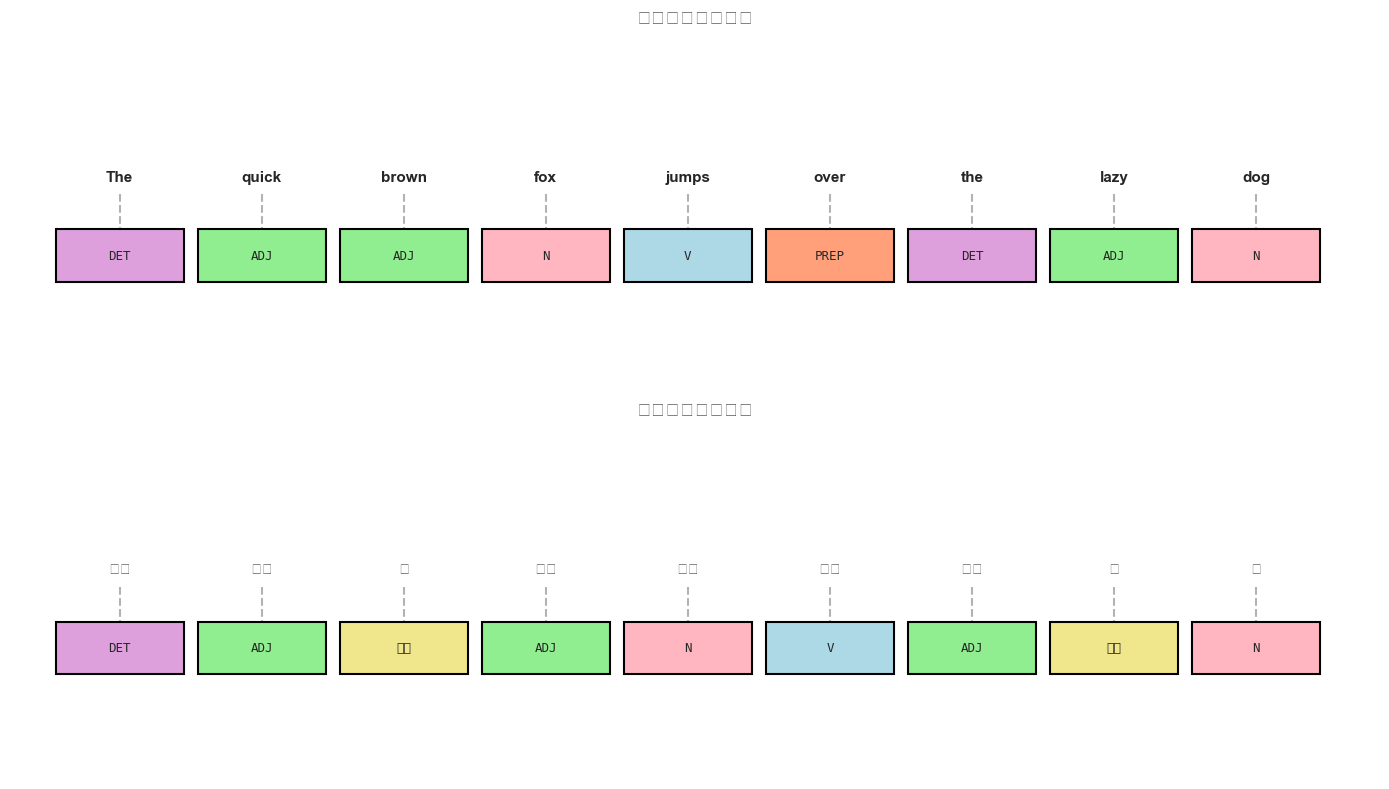


📚 詞性標註用途:
  1. 句法分析: 理解句子結構
  2. 機器翻譯: 正確翻譯詞性
  3. 資訊抽取: 識別關鍵名詞與動詞
  4. 文本生成: 確保語法正確性


In [5]:
# 2.3 詞性標註示例

# 示例句子 (英文)
sentence = "The quick brown fox jumps over the lazy dog"
words = sentence.split()
pos_tags = ["DET", "ADJ", "ADJ", "N", "V", "PREP", "DET", "ADJ", "N"]

# 中文示例
sentence_zh = "這隻 敏捷 的 棕色 狐狸 跳過 懶惰 的 狗"
words_zh = sentence_zh.split()
pos_tags_zh = ["DET", "ADJ", "助詞", "ADJ", "N", "V", "ADJ", "助詞", "N"]

# 視覺化 POS 標註
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(14, 8))

# 定義顏色映射
pos_colors = {
    'N': '#FFB6C1',      # 名詞: 粉紅
    'V': '#ADD8E6',      # 動詞: 淡藍
    'ADJ': '#90EE90',    # 形容詞: 淡綠
    'ADV': '#FFD700',    # 副詞: 金色
    'PREP': '#FFA07A',   # 介詞: 淡橙
    'DET': '#DDA0DD',    # 限定詞: 淡紫
    '助詞': '#F0E68C'     # 助詞: 淡黃
}

def draw_pos_tags(ax, words, tags, title):
    ax.axis('off')
    x_start = 0.5
    spacing = 14 / len(words)
    
    for i, (word, tag) in enumerate(zip(words, tags)):
        x = x_start + i * spacing
        
        # 繪製標籤背景
        rect = mpatches.Rectangle((x, 0.3), spacing * 0.9, 0.15,
                                   facecolor=pos_colors.get(tag, '#F0F0F0'),
                                   edgecolor='black', linewidth=1.5)
        ax.add_patch(rect)
        
        # 繪製詞
        ax.text(x + spacing * 0.45, 0.6, word,
                ha='center', va='center', fontsize=11, fontweight='bold')
        
        # 繪製標籤
        ax.text(x + spacing * 0.45, 0.375, tag,
                ha='center', va='center', fontsize=9, family='monospace')
        
        # 連接線
        ax.plot([x + spacing * 0.45, x + spacing * 0.45], [0.55, 0.45],
                'k--', alpha=0.3)
    
    ax.set_xlim(0, 15)
    ax.set_ylim(0, 1)
    ax.set_title(title, fontsize=14, fontweight='bold', pad=10)

# 繪製英文與中文示例
draw_pos_tags(ax1, words, pos_tags, '英文詞性標註示例')
draw_pos_tags(ax2, words_zh, pos_tags_zh, '中文詞性標註示例')

plt.tight_layout()
plt.show()

print("\n📚 詞性標註用途:")
print("  1. 句法分析: 理解句子結構")
print("  2. 機器翻譯: 正確翻譯詞性")
print("  3. 資訊抽取: 識別關鍵名詞與動詞")
print("  4. 文本生成: 確保語法正確性")

<a id="3"></a>
## 3. 文本分類 (Text Classification)

### 3.1 定義與特點

**定義:** 將整個文本分配到一個或多個預定義類別

**數學表示:**
```
輸入: X = [x_1, x_2, ..., x_n] (文本序列)
輸出: Y ∈ {C_1, C_2, ..., C_k} (類別標籤)
目標: 最大化 P(Y | X)
```

**關鍵特徵:**
- 輸出為單一標籤或多標籤
- 需要理解整個文本語義
- 相對簡單,是 NLP 入門任務

---

### 3.2 情感分析 (Sentiment Analysis)


🎭 情感分析結果:


評論 1: 這部電影太精彩了!劇情緊湊,演員表現出色,強烈推薦!
  😊 情感: 正面 | 信心度: █████████░ 95.00%
--------------------------------------------------------------------------------

評論 2: 服務態度極差,等了一個小時都沒上菜,再也不會來了。
  😠 情感: 負面 | 信心度: █████████░ 92.00%
--------------------------------------------------------------------------------

評論 3: 還可以吧,沒有特別驚艷,也沒有太差。
  😐 情感: 中性 | 信心度: ███████░░░ 78.00%
--------------------------------------------------------------------------------

評論 4: 產品質量非常好,物超所值,已經推薦給朋友了!
  😊 情感: 正面 | 信心度: ████████░░ 89.00%
--------------------------------------------------------------------------------

評論 5: 完全不值這個價格,質量差得離譜,浪費錢。
  😠 情感: 負面 | 信心度: █████████░ 96.00%
--------------------------------------------------------------------------------


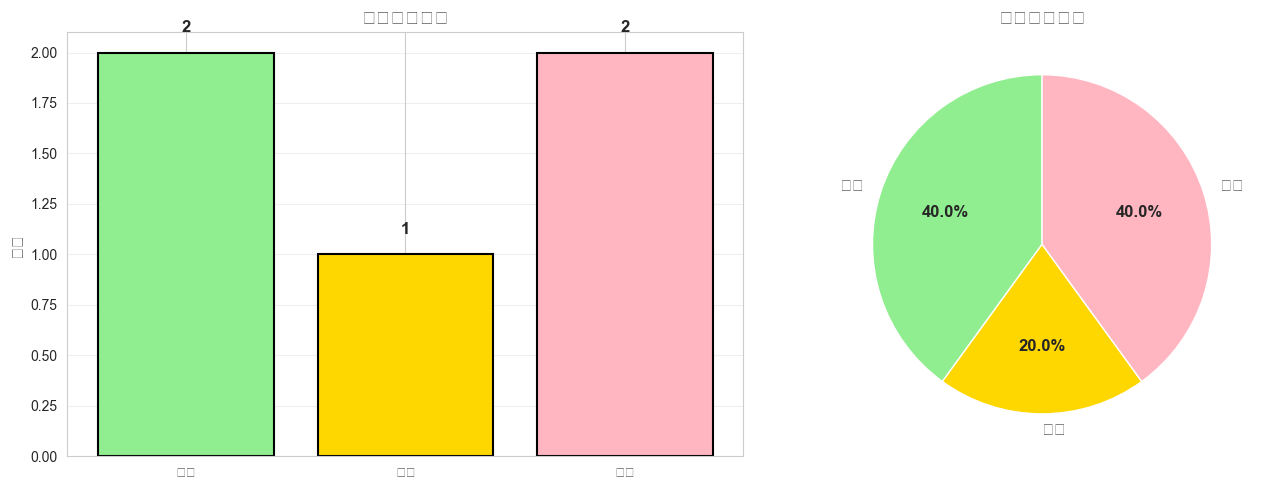


📊 應用場景:
  1. 產品評論分析: 了解客戶滿意度
  2. 社交媒體監控: 追蹤品牌聲譽
  3. 客服分流: 優先處理負面反饋
  4. 市場調研: 分析消費者情緒趨勢


In [6]:
# 3.2 情感分析實作示例

def sentiment_analysis_demo():
    """
    情感分析演示 (三分類: 正面/中性/負面)
    """
    # 測試評論
    reviews = [
        "這部電影太精彩了!劇情緊湊,演員表現出色,強烈推薦!",
        "服務態度極差,等了一個小時都沒上菜,再也不會來了。",
        "還可以吧,沒有特別驚艷,也沒有太差。",
        "產品質量非常好,物超所值,已經推薦給朋友了!",
        "完全不值這個價格,質量差得離譜,浪費錢。"
    ]
    
    # 模擬情感預測結果
    mock_predictions = [
        ("正面", 0.95),
        ("負面", 0.92),
        ("中性", 0.78),
        ("正面", 0.89),
        ("負面", 0.96)
    ]
    
    # 結果統計
    sentiment_counts = {"正面": 0, "中性": 0, "負面": 0}
    
    print("\n🎭 情感分析結果:\n")
    print("=" * 80)
    
    for i, (review, (sentiment, confidence)) in enumerate(zip(reviews, mock_predictions), 1):
        sentiment_counts[sentiment] += 1
        
        # 情感表情符號
        emoji = {"正面": "😊", "中性": "😐", "負面": "😠"}[sentiment]
        
        # 信心度顏色
        conf_bar = "█" * int(confidence * 10) + "░" * (10 - int(confidence * 10))
        
        print(f"\n評論 {i}: {review}")
        print(f"  {emoji} 情感: {sentiment} | 信心度: {conf_bar} {confidence:.2%}")
        print("-" * 80)
    
    return sentiment_counts

# 執行情感分析
sentiment_counts = sentiment_analysis_demo()

# 視覺化統計結果
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(14, 5))

# 柱狀圖
sentiments = list(sentiment_counts.keys())
counts = list(sentiment_counts.values())
colors = ['#90EE90', '#FFD700', '#FFB6C1']

ax1.bar(sentiments, counts, color=colors, edgecolor='black', linewidth=1.5)
ax1.set_ylabel('數量', fontsize=12)
ax1.set_title('情感分布統計', fontsize=14, fontweight='bold')
ax1.grid(axis='y', alpha=0.3)

for i, (sent, count) in enumerate(zip(sentiments, counts)):
    ax1.text(i, count + 0.1, str(count), ha='center', fontsize=12, fontweight='bold')

# 圓餅圖
ax2.pie(counts, labels=sentiments, autopct='%1.1f%%', startangle=90,
        colors=colors, textprops={'fontsize': 12, 'fontweight': 'bold'})
ax2.set_title('情感比例分布', fontsize=14, fontweight='bold')

plt.tight_layout()
plt.show()

print("\n📊 應用場景:")
print("  1. 產品評論分析: 了解客戶滿意度")
print("  2. 社交媒體監控: 追蹤品牌聲譽")
print("  3. 客服分流: 優先處理負面反饋")
print("  4. 市場調研: 分析消費者情緒趨勢")

### 3.3 主題分類 (Topic Classification)


📰 新聞主題分類結果:


💻 [科技] 蘋果發布新款 iPhone,搭載最新 A17 晶片

💰 [財經] 台股今日上漲 200 點,台積電領漲

⚽ [體育] 中華隊在世界棒球經典賽擊敗日本隊

🎬 [娛樂] 新電影《沙丘2》票房破億,評價兩極

🏛️ [政治] 政府宣布新的環保政策,減少碳排放

🏥 [健康] 研究發現新型癌症治療方法,臨床試驗成功



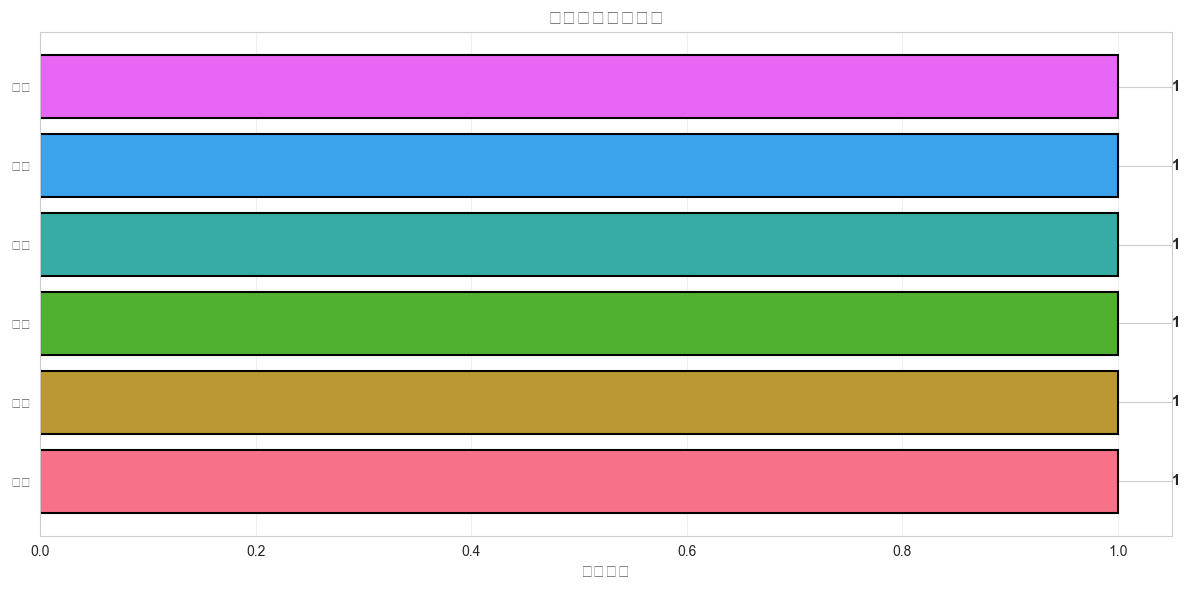


🎯 應用場景:
  1. 新聞聚合平台: 自動分類文章
  2. 內容推薦系統: 推薦相似主題內容
  3. 郵件分類: 自動歸檔郵件
  4. 文檔管理: 智能文件分類


In [7]:
# 3.3 主題分類示例

def topic_classification_demo():
    """
    新聞主題分類演示
    """
    # 測試新聞
    news_articles = [
        ("蘋果發布新款 iPhone,搭載最新 A17 晶片", "科技"),
        ("台股今日上漲 200 點,台積電領漲", "財經"),
        ("中華隊在世界棒球經典賽擊敗日本隊", "體育"),
        ("新電影《沙丘2》票房破億,評價兩極", "娛樂"),
        ("政府宣布新的環保政策,減少碳排放", "政治"),
        ("研究發現新型癌症治療方法,臨床試驗成功", "健康")
    ]
    
    # 統計主題分布
    topic_counts = {}
    for _, topic in news_articles:
        topic_counts[topic] = topic_counts.get(topic, 0) + 1
    
    print("\n📰 新聞主題分類結果:\n")
    print("=" * 70)
    
    # 主題圖示
    topic_icons = {
        "科技": "💻", "財經": "💰", "體育": "⚽",
        "娛樂": "🎬", "政治": "🏛️", "健康": "🏥"
    }
    
    for article, topic in news_articles:
        icon = topic_icons.get(topic, "📌")
        print(f"\n{icon} [{topic}] {article}")
    
    print("\n" + "=" * 70)
    
    return topic_counts

# 執行主題分類
topic_counts = topic_classification_demo()

# 視覺化主題分布
fig, ax = plt.subplots(figsize=(12, 6))

topics = list(topic_counts.keys())
counts = list(topic_counts.values())
colors_palette = sns.color_palette('husl', len(topics))

bars = ax.barh(topics, counts, color=colors_palette, edgecolor='black', linewidth=1.5)

# 添加數值標籤
for i, bar in enumerate(bars):
    width = bar.get_width()
    ax.text(width + 0.05, bar.get_y() + bar.get_height()/2,
            f'{int(width)}',
            ha='left', va='center', fontsize=11, fontweight='bold')

ax.set_xlabel('新聞數量', fontsize=12)
ax.set_title('新聞主題分布統計', fontsize=14, fontweight='bold')
ax.grid(axis='x', alpha=0.3)

plt.tight_layout()
plt.show()

print("\n🎯 應用場景:")
print("  1. 新聞聚合平台: 自動分類文章")
print("  2. 內容推薦系統: 推薦相似主題內容")
print("  3. 郵件分類: 自動歸檔郵件")
print("  4. 文檔管理: 智能文件分類")

<a id="4"></a>
## 4. 序列到序列 (Seq2Seq)

### 4.1 定義與特點

**定義:** 將輸入序列轉換為輸出序列

**數學表示:**
```
輸入: X = [x_1, x_2, ..., x_n]
輸出: Y = [y_1, y_2, ..., y_m]
其中: m ≠ n (長度可以不同)
目標: 最大化 P(Y | X) = ∏ P(y_i | y_<i, X)
```

**關鍵特徵:**
- 輸入輸出長度可以不同
- 需要 Encoder-Decoder 架構
- 自回歸生成 (每次生成依賴前面的輸出)

---

### 4.2 Encoder-Decoder 架構

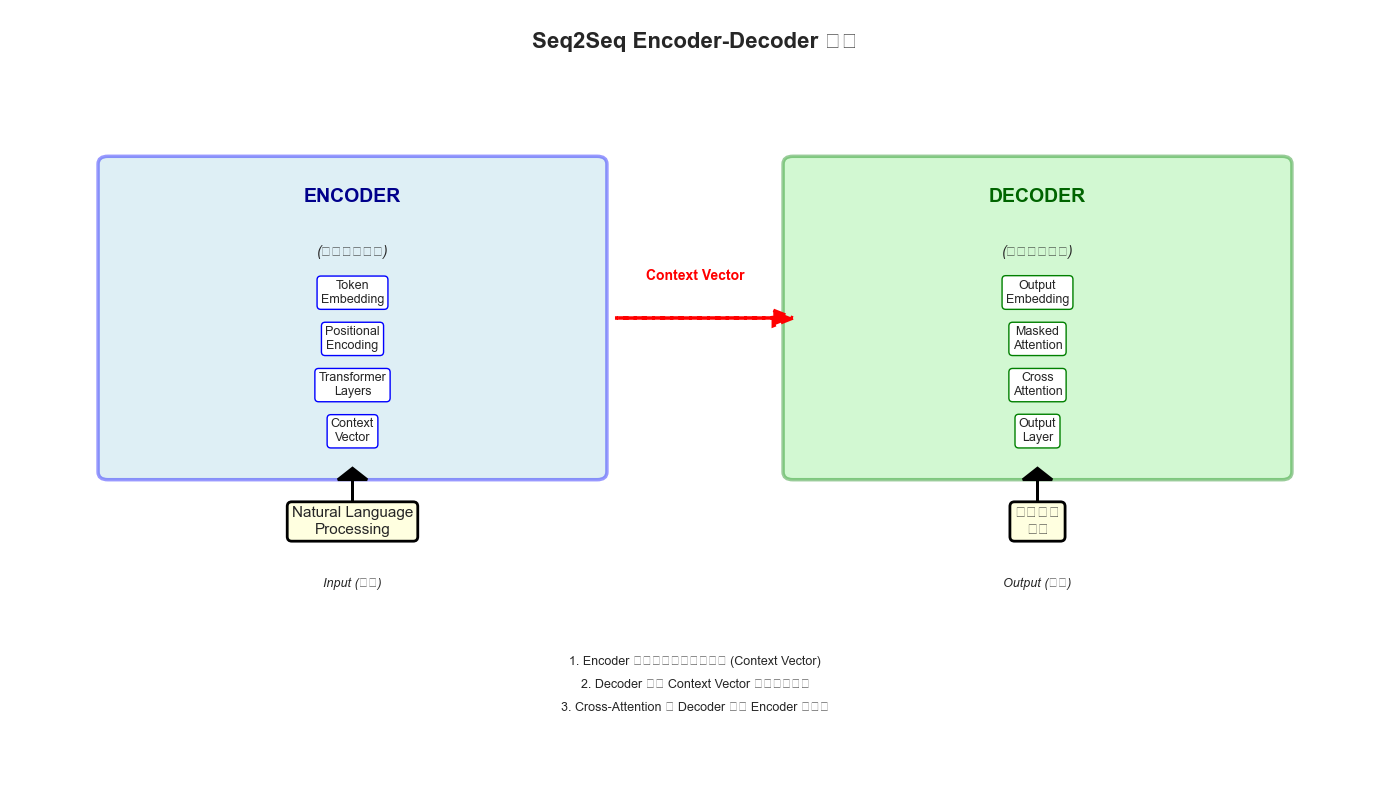


🔑 核心概念:
  • Encoder: 將輸入壓縮為固定維度的語義向量
  • Context Vector: 連接 Encoder 和 Decoder 的橋樑
  • Decoder: 基於語義向量自回歸生成輸出
  • Cross-Attention: Decoder 動態關注 Encoder 的輸出


In [8]:
# 4.2 視覺化 Encoder-Decoder 架構

fig, ax = plt.subplots(figsize=(14, 8))
ax.set_xlim(0, 14)
ax.set_ylim(0, 10)
ax.axis('off')

# 標題
ax.text(7, 9.5, 'Seq2Seq Encoder-Decoder 架構', ha='center',
        fontsize=16, fontweight='bold')

# Encoder 部分
encoder_rect = mpatches.FancyBboxPatch(
    (1, 4), 5, 4,
    boxstyle="round,pad=0.1",
    linewidth=2.5,
    edgecolor='blue',
    facecolor='lightblue',
    alpha=0.4
)
ax.add_patch(encoder_rect)
ax.text(3.5, 7.5, 'ENCODER', ha='center', fontsize=14, fontweight='bold', color='darkblue')
ax.text(3.5, 6.8, '(理解輸入語義)', ha='center', fontsize=10, style='italic')

# Encoder 層
encoder_layers = ['Token\nEmbedding', 'Positional\nEncoding', 'Transformer\nLayers', 'Context\nVector']
for i, layer in enumerate(encoder_layers):
    y_pos = 6.2 - i * 0.6
    ax.text(3.5, y_pos, layer, ha='center', fontsize=9,
            bbox=dict(boxstyle='round', facecolor='white', edgecolor='blue'))

# Decoder 部分
decoder_rect = mpatches.FancyBboxPatch(
    (8, 4), 5, 4,
    boxstyle="round,pad=0.1",
    linewidth=2.5,
    edgecolor='green',
    facecolor='lightgreen',
    alpha=0.4
)
ax.add_patch(decoder_rect)
ax.text(10.5, 7.5, 'DECODER', ha='center', fontsize=14, fontweight='bold', color='darkgreen')
ax.text(10.5, 6.8, '(生成輸出序列)', ha='center', fontsize=10, style='italic')

# Decoder 層
decoder_layers = ['Output\nEmbedding', 'Masked\nAttention', 'Cross\nAttention', 'Output\nLayer']
for i, layer in enumerate(decoder_layers):
    y_pos = 6.2 - i * 0.6
    ax.text(10.5, y_pos, layer, ha='center', fontsize=9,
            bbox=dict(boxstyle='round', facecolor='white', edgecolor='green'))

# 輸入輸出
input_text = "Natural Language\nProcessing"
output_text = "自然語言\n處理"

ax.text(3.5, 3.2, input_text, ha='center', fontsize=11,
        bbox=dict(boxstyle='round', facecolor='lightyellow', edgecolor='black', linewidth=2))
ax.text(3.5, 2.5, 'Input (英文)', ha='center', fontsize=9, style='italic')

ax.text(10.5, 3.2, output_text, ha='center', fontsize=11,
        bbox=dict(boxstyle='round', facecolor='lightyellow', edgecolor='black', linewidth=2))
ax.text(10.5, 2.5, 'Output (中文)', ha='center', fontsize=9, style='italic')

# 箭頭
ax.arrow(3.5, 3.6, 0, 0.3, head_width=0.3, head_length=0.15,
         fc='black', ec='black', linewidth=2)
ax.arrow(10.5, 3.6, 0, 0.3, head_width=0.3, head_length=0.15,
         fc='black', ec='black', linewidth=2)

# Context Vector 傳遞
ax.arrow(6.2, 6, 1.6, 0, head_width=0.2, head_length=0.2,
         fc='red', ec='red', linewidth=2.5, linestyle='--')
ax.text(7, 6.5, 'Context Vector', ha='center', fontsize=10,
        fontweight='bold', color='red')

# 說明文字
explanation = [
    "1. Encoder 將輸入編碼為語義表示 (Context Vector)",
    "2. Decoder 基於 Context Vector 逐步生成輸出",
    "3. Cross-Attention 讓 Decoder 關注 Encoder 的輸出"
]

for i, text in enumerate(explanation):
    ax.text(7, 1.5 - i * 0.3, text, ha='center', fontsize=9)

plt.tight_layout()
plt.show()

print("\n🔑 核心概念:")
print("  • Encoder: 將輸入壓縮為固定維度的語義向量")
print("  • Context Vector: 連接 Encoder 和 Decoder 的橋樑")
print("  • Decoder: 基於語義向量自回歸生成輸出")
print("  • Cross-Attention: Decoder 動態關注 Encoder 的輸出")

### 4.3 機器翻譯與文本摘要

In [9]:
# 4.3 機器翻譯與文本摘要示例

def seq2seq_applications_demo():
    """
    展示 Seq2Seq 的兩大應用: 機器翻譯與文本摘要
    """
    print("\n🌐 應用 1: 機器翻譯 (Machine Translation)\n")
    print("=" * 70)
    
    # 翻譯示例
    translations = [
        {
            "source": "Natural Language Processing is a fascinating field.",
            "target": "自然語言處理是一個迷人的領域。",
            "lang": "English → Chinese"
        },
        {
            "source": "人工智能正在改變世界。",
            "target": "Artificial Intelligence is changing the world.",
            "lang": "Chinese → English"
        }
    ]
    
    for trans in translations:
        print(f"\n語言對: {trans['lang']}")
        print(f"源文本: {trans['source']}")
        print(f"翻譯: {trans['target']}")
        print("-" * 70)
    
    print("\n\n📝 應用 2: 文本摘要 (Text Summarization)\n")
    print("=" * 70)
    
    # 摘要示例
    articles = [
        {
            "title": "新聞摘要",
            "original": """蘋果公司今日在其加州總部舉行發布會,宣布推出全新的 iPhone 15 系列手機。
新款手機搭載最新的 A17 晶片,相比前代性能提升 30%,並首次支援 USB-C 接口。
此外,相機系統也得到重大升級,主鏡頭達到 4800 萬像素,支援 8K 視頻錄製。
蘋果執行長庫克表示,這是公司有史以來最強大的 iPhone。""",
            "summary": "蘋果發布 iPhone 15 系列,搭載 A17 晶片,支援 USB-C,相機升級至 4800 萬像素。"
        }
    ]
    
    for article in articles:
        print(f"\n📰 {article['title']}\n")
        print(f"原文 ({len(article['original'])} 字):")
        print(article['original'])
        print(f"\n摘要 ({len(article['summary'])} 字):")
        print(f"✨ {article['summary']}")
        print("-" * 70)
        
        # 計算壓縮比
        compression_ratio = len(article['summary']) / len(article['original'])
        print(f"\n壓縮比: {compression_ratio:.1%} (保留 {compression_ratio:.0%} 長度)")

seq2seq_applications_demo()

print("\n\n💡 Seq2Seq 任務特點:")
print("  1. 輸入輸出長度不固定")
print("  2. 需要理解整體語義")
print("  3. 生成過程是自回歸的 (依賴前面的輸出)")
print("  4. 需要大量平行語料訓練")


🌐 應用 1: 機器翻譯 (Machine Translation)


語言對: English → Chinese
源文本: Natural Language Processing is a fascinating field.
翻譯: 自然語言處理是一個迷人的領域。
----------------------------------------------------------------------

語言對: Chinese → English
源文本: 人工智能正在改變世界。
翻譯: Artificial Intelligence is changing the world.
----------------------------------------------------------------------


📝 應用 2: 文本摘要 (Text Summarization)


📰 新聞摘要

原文 (160 字):
蘋果公司今日在其加州總部舉行發布會,宣布推出全新的 iPhone 15 系列手機。
新款手機搭載最新的 A17 晶片,相比前代性能提升 30%,並首次支援 USB-C 接口。
此外,相機系統也得到重大升級,主鏡頭達到 4800 萬像素,支援 8K 視頻錄製。
蘋果執行長庫克表示,這是公司有史以來最強大的 iPhone。

摘要 (52 字):
✨ 蘋果發布 iPhone 15 系列,搭載 A17 晶片,支援 USB-C,相機升級至 4800 萬像素。
----------------------------------------------------------------------

壓縮比: 32.5% (保留 32% 長度)


💡 Seq2Seq 任務特點:
  1. 輸入輸出長度不固定
  2. 需要理解整體語義
  3. 生成過程是自回歸的 (依賴前面的輸出)
  4. 需要大量平行語料訓練


<a id="5"></a>
## 5. 問答系統 (Question Answering)

### 5.1 抽取式問答 vs 生成式問答

| 特性 | 抽取式問答 (Extractive QA) | 生成式問答 (Generative QA) |
|:-----|:--------------------------|:--------------------------|
| **輸出方式** | 從文章中抽取片段 | 自由生成答案 |
| **代表模型** | BERT-QA, RoBERTa | GPT, T5, ChatGPT |
| **優點** | 答案有明確來源,可驗證 | 靈活,可總結歸納 |
| **缺點** | 受限於原文,無法總結 | 可能生成錯誤訊息 |
| **應用場景** | 閱讀理解,文檔搜尋 | 對話系統,智能客服 |

---

### 5.2 抽取式問答實作


📄 上下文文章:

台灣積體電路製造公司(簡稱台積電,TSMC)成立於 1987 年,是全球最大的專業積體電路製造服務公司。
總部位於台灣新竹科學園區。台積電由工業技術研究院(工研院)衍生成立,創辦人為張忠謀博士。
台積電開創了專業積體電路製造服務(晶圓代工)商業模式,專注於生產由客戶所設計的晶片。
截至 2023 年,台積電擁有超過 7 萬名員工,市值超過 5000 億美元,是台灣市值最高的上市公司。
台積電的主要客戶包括蘋果、NVIDIA、AMD、高通等國際科技巨頭。


❓ 抽取式問答結果:


問題 1: 台積電是什麼時候成立的?
  答案: 1987 年
  信心度: █████████ 96.00%
  上下文: ...製造公司(簡稱台積電,TSMC)成立於 【1987 年】,是全球最大的專業積體電路製造服務公司。...
--------------------------------------------------------------------------------

問題 2: 台積電的創辦人是誰?
  答案: 張忠謀博士
  信心度: █████████ 98.00%
  上下文: ...業技術研究院(工研院)衍生成立,創辦人為【張忠謀博士】。
台積電開創了專業積體電路製造服務(晶...
--------------------------------------------------------------------------------

問題 3: 台積電總部在哪裡?
  答案: 台灣新竹科學園區
  信心度: █████████ 94.00%
  上下文: ...大的專業積體電路製造服務公司。
總部位於【台灣新竹科學園區。】台積電由工業技術研究院(工研院)衍生成立...
--------------------------------------------------------------------------------

問題 4: 台積電的主要客戶有哪些?
  答案: 蘋果、NVIDIA、AMD、高通
  信心度: ████████ 89.00%
  上下文: ...值最高的上市公司。
台積電的主要客戶包括【蘋果、NVIDIA、AMD、高通】等國際科技巨頭。...
----------------------

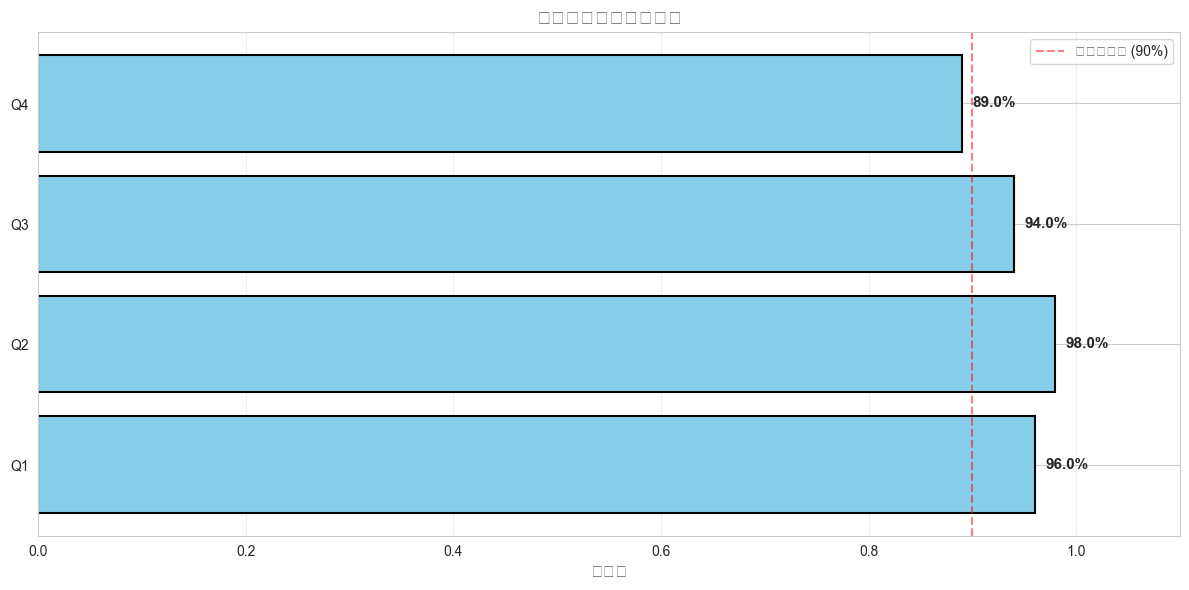


💡 抽取式問答特點:
  1. 答案必須在原文中存在
  2. 可以定位答案的精確位置
  3. 答案有明確依據,易於驗證
  4. 無法處理需要推理或總結的問題


In [10]:
# 5.2 抽取式問答示例

def extractive_qa_demo():
    """
    抽取式問答演示
    """
    # 上下文文章
    context = """台灣積體電路製造公司(簡稱台積電,TSMC)成立於 1987 年,是全球最大的專業積體電路製造服務公司。
總部位於台灣新竹科學園區。台積電由工業技術研究院(工研院)衍生成立,創辦人為張忠謀博士。
台積電開創了專業積體電路製造服務(晶圓代工)商業模式,專注於生產由客戶所設計的晶片。
截至 2023 年,台積電擁有超過 7 萬名員工,市值超過 5000 億美元,是台灣市值最高的上市公司。
台積電的主要客戶包括蘋果、NVIDIA、AMD、高通等國際科技巨頭。"""
    
    # 問題與答案 (模擬抽取結果)
    qa_pairs = [
        {
            "question": "台積電是什麼時候成立的?",
            "answer": "1987 年",
            "start": context.find("1987 年"),
            "end": context.find("1987 年") + 6,
            "confidence": 0.96
        },
        {
            "question": "台積電的創辦人是誰?",
            "answer": "張忠謀博士",
            "start": context.find("張忠謀博士"),
            "end": context.find("張忠謀博士") + 5,
            "confidence": 0.98
        },
        {
            "question": "台積電總部在哪裡?",
            "answer": "台灣新竹科學園區",
            "start": context.find("台灣新竹科學園區"),
            "end": context.find("台灣新竹科學園區") + 9,
            "confidence": 0.94
        },
        {
            "question": "台積電的主要客戶有哪些?",
            "answer": "蘋果、NVIDIA、AMD、高通",
            "start": context.find("蘋果"),
            "end": context.find("高通") + 2,
            "confidence": 0.89
        }
    ]
    
    print("\n📄 上下文文章:\n")
    print("=" * 80)
    print(context)
    print("=" * 80)
    
    print("\n\n❓ 抽取式問答結果:\n")
    
    for i, qa in enumerate(qa_pairs, 1):
        print(f"\n問題 {i}: {qa['question']}")
        
        # 顯示答案在文章中的位置
        before = context[max(0, qa['start']-20):qa['start']]
        answer = context[qa['start']:qa['end']]
        after = context[qa['end']:min(len(context), qa['end']+20)]
        
        print(f"  答案: {qa['answer']}")
        print(f"  信心度: {'█' * int(qa['confidence'] * 10)} {qa['confidence']:.2%}")
        print(f"  上下文: ...{before}【{answer}】{after}...")
        print("-" * 80)
    
    return qa_pairs

qa_pairs = extractive_qa_demo()

# 視覺化信心度
fig, ax = plt.subplots(figsize=(12, 6))

questions = [f"Q{i+1}" for i in range(len(qa_pairs))]
confidences = [qa['confidence'] for qa in qa_pairs]

bars = ax.barh(questions, confidences, color='skyblue', edgecolor='black', linewidth=1.5)

# 添加信心度標籤
for i, (bar, conf) in enumerate(zip(bars, confidences)):
    ax.text(conf + 0.01, bar.get_y() + bar.get_height()/2,
            f'{conf:.1%}',
            ha='left', va='center', fontsize=11, fontweight='bold')

ax.set_xlabel('信心度', fontsize=12)
ax.set_title('抽取式問答信心度分析', fontsize=14, fontweight='bold')
ax.set_xlim(0, 1.1)
ax.axvline(x=0.9, color='red', linestyle='--', alpha=0.5, label='高信心閾值 (90%)')
ax.legend()
ax.grid(axis='x', alpha=0.3)

plt.tight_layout()
plt.show()

print("\n💡 抽取式問答特點:")
print("  1. 答案必須在原文中存在")
print("  2. 可以定位答案的精確位置")
print("  3. 答案有明確依據,易於驗證")
print("  4. 無法處理需要推理或總結的問題")

<a id="6"></a>
## 6. 統一建模框架

### 6.1 所有任務都是 Seq2Seq

從第一原理出發,所有 NLP 任務本質上都是**序列建模問題**:

```
給定輸入序列 X = (x_1, x_2, ..., x_n)
目標: 預測輸出序列 Y = (y_1, y_2, ..., y_m)

最大化聯合機率:
P(Y | X) = ∏_{i=1}^m P(y_i | y_{<i}, X)
```

**不同任務的差異:**

1. **序列標註**: m = n, y_i ∈ {B, I, O, ...}
2. **文本分類**: m = 1, y_1 ∈ {正面, 負面, 中性}
3. **翻譯/摘要**: m ≠ n, y_i ∈ 詞彙表
4. **問答**: y 為文章片段或生成文本

---

### 6.2 BERT vs GPT: 雙向 vs 單向

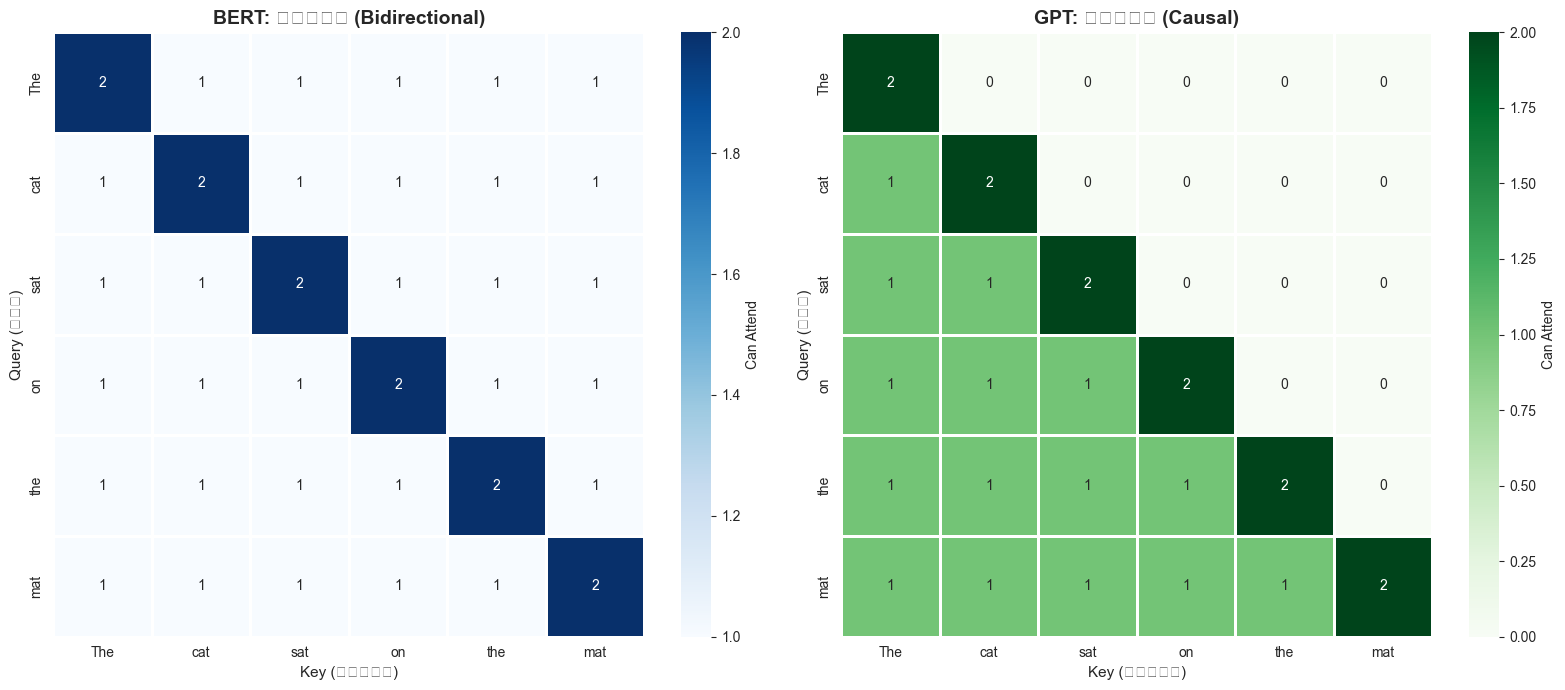


🔍 BERT vs GPT 注意力機制對比:


【BERT - 雙向編碼器】
  ✓ 每個位置可以看到『前後所有詞』
  ✓ 適合理解任務 (分類、NER、問答)
  ✓ 需要完整輸入才能開始處理
  ✗ 無法用於生成任務 (因為看到了未來的詞)

【GPT - 單向解碼器】
  ✓ 每個位置只能看到『前面的詞』(因果遮蔽)
  ✓ 適合生成任務 (對話、續寫、翻譯)
  ✓ 可以逐詞生成 (自回歸)
  ✗ 無法同時看到前後文 (理解能力較弱)



In [11]:
# 6.2 視覺化 BERT vs GPT 的注意力機制差異

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 7))

# 示例句子
sentence = "The cat sat on the mat"
tokens = sentence.split()
n_tokens = len(tokens)

# BERT: 雙向注意力 (每個詞可以看到所有詞)
bert_attention = np.ones((n_tokens, n_tokens))
np.fill_diagonal(bert_attention, 2)  # 對角線加強

# GPT: 單向注意力 (只能看到前面的詞)
gpt_attention = np.tril(np.ones((n_tokens, n_tokens)))
np.fill_diagonal(gpt_attention, 2)

# 繪製 BERT 注意力
sns.heatmap(bert_attention, annot=True, fmt='.0f', cmap='Blues',
            xticklabels=tokens, yticklabels=tokens,
            cbar_kws={'label': 'Can Attend'}, ax=ax1,
            linewidths=1, linecolor='white')
ax1.set_title('BERT: 雙向注意力 (Bidirectional)', fontsize=14, fontweight='bold')
ax1.set_xlabel('Key (被關注的詞)', fontsize=11)
ax1.set_ylabel('Query (查詢詞)', fontsize=11)

# 繪製 GPT 注意力
sns.heatmap(gpt_attention, annot=True, fmt='.0f', cmap='Greens',
            xticklabels=tokens, yticklabels=tokens,
            cbar_kws={'label': 'Can Attend'}, ax=ax2,
            linewidths=1, linecolor='white')
ax2.set_title('GPT: 單向注意力 (Causal)', fontsize=14, fontweight='bold')
ax2.set_xlabel('Key (被關注的詞)', fontsize=11)
ax2.set_ylabel('Query (查詢詞)', fontsize=11)

plt.tight_layout()
plt.show()

print("\n🔍 BERT vs GPT 注意力機制對比:\n")
print("=" * 70)
print("\n【BERT - 雙向編碼器】")
print("  ✓ 每個位置可以看到『前後所有詞』")
print("  ✓ 適合理解任務 (分類、NER、問答)")
print("  ✓ 需要完整輸入才能開始處理")
print("  ✗ 無法用於生成任務 (因為看到了未來的詞)")
print("\n【GPT - 單向解碼器】")
print("  ✓ 每個位置只能看到『前面的詞』(因果遮蔽)")
print("  ✓ 適合生成任務 (對話、續寫、翻譯)")
print("  ✓ 可以逐詞生成 (自回歸)")
print("  ✗ 無法同時看到前後文 (理解能力較弱)")
print("\n" + "=" * 70)

### 6.3 T5: 統一的 Text-to-Text 框架

**T5 (Text-to-Text Transfer Transformer)** 將所有 NLP 任務統一為文本到文本的轉換:

```python
# 所有任務都轉換為相同格式

# 翻譯
Input:  "translate English to German: That is good."
Output: "Das ist gut."

# 情感分析
Input:  "sentiment: This movie is great!"
Output: "positive"

# 摘要
Input:  "summarize: [長文章]"
Output: "[摘要]"

# 問答
Input:  "question: What is NLP? context: [文章]"
Output: "Natural Language Processing"
```

**優勢:**
- 統一架構,一個模型處理所有任務
- 多任務學習,任務間互相促進
- 簡化訓練與部署流程

---

<a id="7"></a>
## 7. 評估指標實戰

### 7.1 分類任務指標: Precision, Recall, F1


📊 情感分析評估結果:


準確率 (Accuracy):  80.00%
精確率 (Precision): 80.00%
召回率 (Recall):    80.00%
F1 分數 (F1-Score): 80.00%



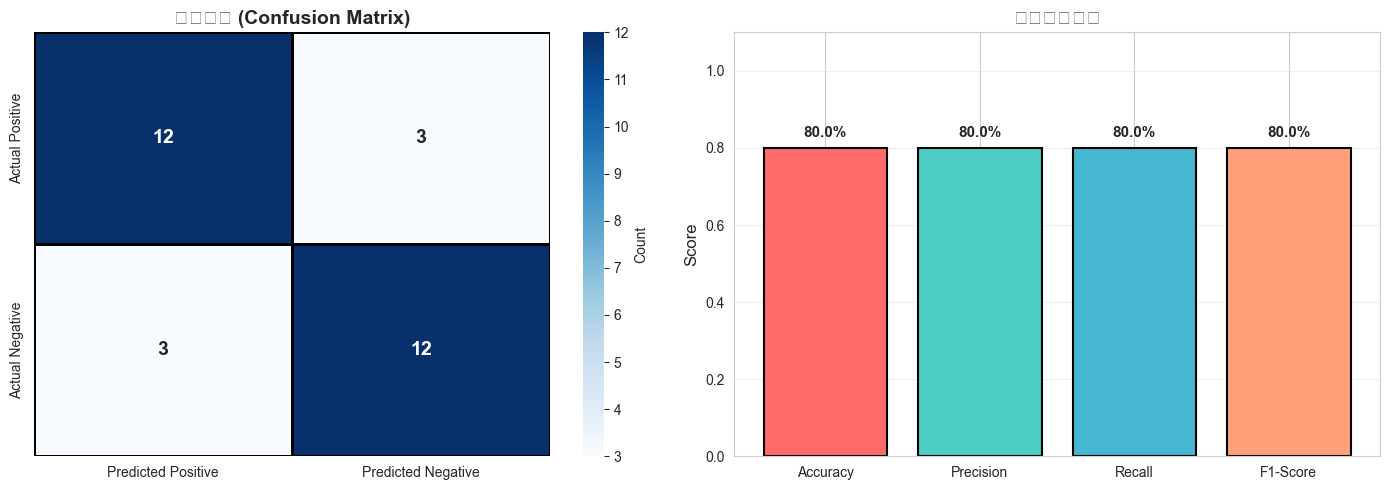


💡 指標解釋:
  • Accuracy: 預測正確的比例 (整體準確度)
  • Precision: 預測為正面中,真正是正面的比例 (查準率)
  • Recall: 實際為正面中,被預測為正面的比例 (查全率)
  • F1-Score: Precision 和 Recall 的調和平均數


In [12]:
# 7.1 實作分類評估指標

def calculate_classification_metrics(y_true: List[str], y_pred: List[str]) -> Dict[str, float]:
    """
    計算分類任務的評估指標
    
    Args:
        y_true: 真實標籤
        y_pred: 預測標籤
        
    Returns:
        metrics: 包含 accuracy, precision, recall, f1 的字典
    """
    # 計算混淆矩陣元素
    tp = sum(1 for true, pred in zip(y_true, y_pred) if true == pred and true == 'positive')
    tn = sum(1 for true, pred in zip(y_true, y_pred) if true == pred and true == 'negative')
    fp = sum(1 for true, pred in zip(y_true, y_pred) if true != pred and pred == 'positive')
    fn = sum(1 for true, pred in zip(y_true, y_pred) if true != pred and pred == 'negative')
    
    # 計算指標
    accuracy = (tp + tn) / len(y_true) if len(y_true) > 0 else 0
    precision = tp / (tp + fp) if (tp + fp) > 0 else 0
    recall = tp / (tp + fn) if (tp + fn) > 0 else 0
    f1 = 2 * (precision * recall) / (precision + recall) if (precision + recall) > 0 else 0
    
    return {
        'accuracy': accuracy,
        'precision': precision,
        'recall': recall,
        'f1': f1,
        'confusion_matrix': {'TP': tp, 'TN': tn, 'FP': fp, 'FN': fn}
    }

# 模擬情感分析結果
y_true = ['positive', 'positive', 'negative', 'positive', 'negative', 
          'negative', 'positive', 'negative', 'positive', 'negative'] * 3
y_pred = ['positive', 'negative', 'negative', 'positive', 'negative',
          'positive', 'positive', 'negative', 'positive', 'negative'] * 3

# 計算指標
metrics = calculate_classification_metrics(y_true, y_pred)

print("\n📊 情感分析評估結果:\n")
print("=" * 60)
print(f"\n準確率 (Accuracy):  {metrics['accuracy']:.2%}")
print(f"精確率 (Precision): {metrics['precision']:.2%}")
print(f"召回率 (Recall):    {metrics['recall']:.2%}")
print(f"F1 分數 (F1-Score): {metrics['f1']:.2%}")
print("\n" + "=" * 60)

# 視覺化混淆矩陣
cm = metrics['confusion_matrix']
confusion_matrix = np.array([[cm['TP'], cm['FP']], [cm['FN'], cm['TN']]])

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(14, 5))

# 混淆矩陣熱圖
sns.heatmap(confusion_matrix, annot=True, fmt='d', cmap='Blues',
            xticklabels=['Predicted Positive', 'Predicted Negative'],
            yticklabels=['Actual Positive', 'Actual Negative'],
            cbar_kws={'label': 'Count'}, ax=ax1,
            linewidths=2, linecolor='black', annot_kws={'fontsize': 14, 'fontweight': 'bold'})
ax1.set_title('混淆矩陣 (Confusion Matrix)', fontsize=14, fontweight='bold')

# 指標柱狀圖
metric_names = ['Accuracy', 'Precision', 'Recall', 'F1-Score']
metric_values = [metrics['accuracy'], metrics['precision'], metrics['recall'], metrics['f1']]

bars = ax2.bar(metric_names, metric_values, color=['#FF6B6B', '#4ECDC4', '#45B7D1', '#FFA07A'],
               edgecolor='black', linewidth=1.5)

# 添加數值標籤
for bar, value in zip(bars, metric_values):
    height = bar.get_height()
    ax2.text(bar.get_x() + bar.get_width()/2., height + 0.02,
             f'{value:.1%}',
             ha='center', va='bottom', fontsize=11, fontweight='bold')

ax2.set_ylabel('Score', fontsize=12)
ax2.set_title('分類評估指標', fontsize=14, fontweight='bold')
ax2.set_ylim(0, 1.1)
ax2.grid(axis='y', alpha=0.3)

plt.tight_layout()
plt.show()

print("\n💡 指標解釋:")
print("  • Accuracy: 預測正確的比例 (整體準確度)")
print("  • Precision: 預測為正面中,真正是正面的比例 (查準率)")
print("  • Recall: 實際為正面中,被預測為正面的比例 (查全率)")
print("  • F1-Score: Precision 和 Recall 的調和平均數")

### 7.2 生成任務指標: BLEU, ROUGE


🌐 機器翻譯評估 (BLEU):


原文: Natural Language Processing is fascinating
參考翻譯: 自然 語言 處理 很 迷人
機器翻譯: 自然 語言 處理 很 迷人
BLEU 分數: 100.00%
----------------------------------------------------------------------

原文: I love machine learning
參考翻譯: 我 愛 機器 學習
機器翻譯: 我 喜歡 機器 學習
BLEU 分數: 0.00%
----------------------------------------------------------------------


📝 文本摘要評估 (ROUGE):


參考摘要: 蘋果 發布 新 iPhone 搭載 A17 晶片
生成摘要: 蘋果 推出 新 iPhone 使用 A17 晶片
ROUGE-L 分數: 71.43%
----------------------------------------------------------------------

參考摘要: 台積電 是 全球 最大 晶圓 代工 廠
生成摘要: 台積電 為 世界 最大 的 晶圓 代工 公司
ROUGE-L 分數: 53.33%
----------------------------------------------------------------------


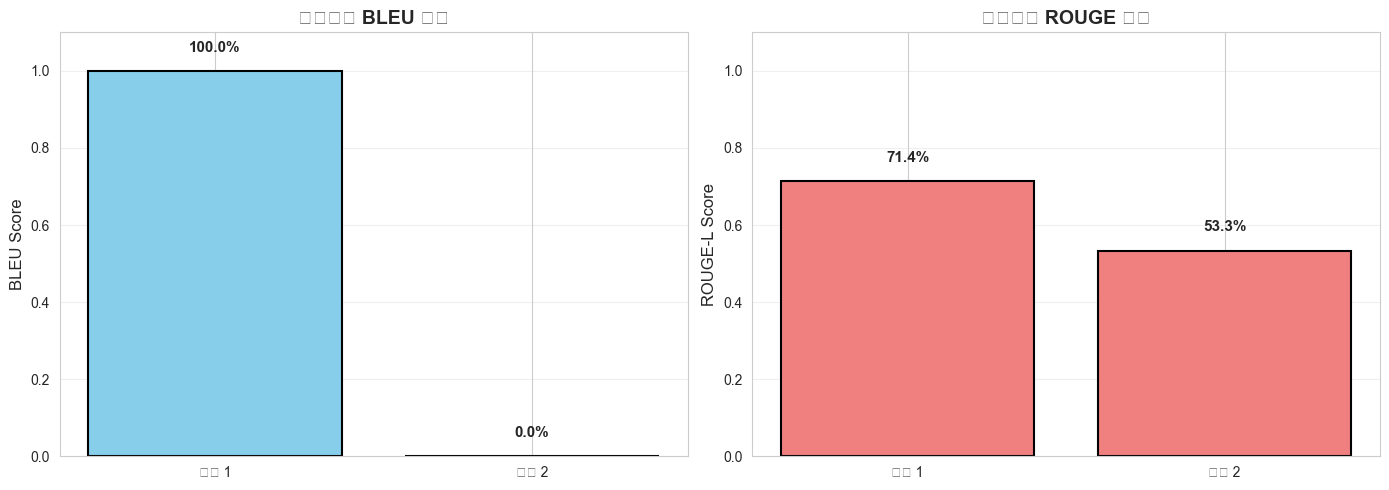


💡 指標說明:
  • BLEU: 評估翻譯質量,基於 N-gram 重疊度 (0-1,越高越好)
  • ROUGE: 評估摘要質量,基於最長公共子序列 (0-1,越高越好)
  • 標準值: BLEU > 0.30 為良好, ROUGE-L > 0.40 為良好


In [13]:
# 7.2 實作 BLEU 與 ROUGE 指標

from collections import Counter

def calculate_bleu_score(reference: str, candidate: str, n: int = 4) -> float:
    """
    計算簡化版 BLEU 分數 (N-gram 重疊度)
    
    Args:
        reference: 參考翻譯
        candidate: 候選翻譯
        n: N-gram 最大長度
        
    Returns:
        bleu: BLEU 分數
    """
    ref_tokens = reference.split()
    cand_tokens = candidate.split()
    
    # 計算不同 N-gram 的精確率
    precisions = []
    for i in range(1, n + 1):
        ref_ngrams = [tuple(ref_tokens[j:j+i]) for j in range(len(ref_tokens) - i + 1)]
        cand_ngrams = [tuple(cand_tokens[j:j+i]) for j in range(len(cand_tokens) - i + 1)]
        
        if len(cand_ngrams) == 0:
            precisions.append(0)
            continue
        
        ref_counter = Counter(ref_ngrams)
        cand_counter = Counter(cand_ngrams)
        
        # 計算匹配的 N-gram 數量
        matches = sum((cand_counter & ref_counter).values())
        precision = matches / len(cand_ngrams)
        precisions.append(precision)
    
    # BLEU 是幾何平均數
    if all(p > 0 for p in precisions):
        bleu = np.exp(np.mean([np.log(p) for p in precisions]))
    else:
        bleu = 0
    
    # 簡化版,忽略 Brevity Penalty
    return bleu

def calculate_rouge_l(reference: str, candidate: str) -> float:
    """
    計算 ROUGE-L 分數 (最長公共子序列)
    
    Args:
        reference: 參考摘要
        candidate: 候選摘要
        
    Returns:
        rouge_l: ROUGE-L F1 分數
    """
    ref_tokens = reference.split()
    cand_tokens = candidate.split()
    
    # 計算最長公共子序列 (LCS)
    m, n = len(ref_tokens), len(cand_tokens)
    dp = [[0] * (n + 1) for _ in range(m + 1)]
    
    for i in range(1, m + 1):
        for j in range(1, n + 1):
            if ref_tokens[i-1] == cand_tokens[j-1]:
                dp[i][j] = dp[i-1][j-1] + 1
            else:
                dp[i][j] = max(dp[i-1][j], dp[i][j-1])
    
    lcs_length = dp[m][n]
    
    # 計算 Precision, Recall, F1
    precision = lcs_length / n if n > 0 else 0
    recall = lcs_length / m if m > 0 else 0
    f1 = 2 * precision * recall / (precision + recall) if (precision + recall) > 0 else 0
    
    return f1

# 測試 BLEU 與 ROUGE
print("\n🌐 機器翻譯評估 (BLEU):\n")
print("=" * 70)

translation_examples = [
    {
        "source": "Natural Language Processing is fascinating",
        "reference": "自然 語言 處理 很 迷人",
        "candidate": "自然 語言 處理 很 迷人"
    },
    {
        "source": "I love machine learning",
        "reference": "我 愛 機器 學習",
        "candidate": "我 喜歡 機器 學習"
    }
]

bleu_scores = []
for ex in translation_examples:
    bleu = calculate_bleu_score(ex['reference'], ex['candidate'])
    bleu_scores.append(bleu)
    print(f"\n原文: {ex['source']}")
    print(f"參考翻譯: {ex['reference']}")
    print(f"機器翻譯: {ex['candidate']}")
    print(f"BLEU 分數: {bleu:.2%}")
    print("-" * 70)

print("\n\n📝 文本摘要評估 (ROUGE):\n")
print("=" * 70)

summary_examples = [
    {
        "reference": "蘋果 發布 新 iPhone 搭載 A17 晶片",
        "candidate": "蘋果 推出 新 iPhone 使用 A17 晶片"
    },
    {
        "reference": "台積電 是 全球 最大 晶圓 代工 廠",
        "candidate": "台積電 為 世界 最大 的 晶圓 代工 公司"
    }
]

rouge_scores = []
for ex in summary_examples:
    rouge = calculate_rouge_l(ex['reference'], ex['candidate'])
    rouge_scores.append(rouge)
    print(f"\n參考摘要: {ex['reference']}")
    print(f"生成摘要: {ex['candidate']}")
    print(f"ROUGE-L 分數: {rouge:.2%}")
    print("-" * 70)

# 視覺化評估結果
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(14, 5))

# BLEU 分數
ax1.bar(range(len(bleu_scores)), bleu_scores, color='skyblue', edgecolor='black', linewidth=1.5)
ax1.set_xticks(range(len(bleu_scores)))
ax1.set_xticklabels([f'翻譯 {i+1}' for i in range(len(bleu_scores))])
ax1.set_ylabel('BLEU Score', fontsize=12)
ax1.set_title('機器翻譯 BLEU 評估', fontsize=14, fontweight='bold')
ax1.set_ylim(0, 1.1)
ax1.grid(axis='y', alpha=0.3)

for i, score in enumerate(bleu_scores):
    ax1.text(i, score + 0.05, f'{score:.1%}', ha='center', fontsize=11, fontweight='bold')

# ROUGE 分數
ax2.bar(range(len(rouge_scores)), rouge_scores, color='lightcoral', edgecolor='black', linewidth=1.5)
ax2.set_xticks(range(len(rouge_scores)))
ax2.set_xticklabels([f'摘要 {i+1}' for i in range(len(rouge_scores))])
ax2.set_ylabel('ROUGE-L Score', fontsize=12)
ax2.set_title('文本摘要 ROUGE 評估', fontsize=14, fontweight='bold')
ax2.set_ylim(0, 1.1)
ax2.grid(axis='y', alpha=0.3)

for i, score in enumerate(rouge_scores):
    ax2.text(i, score + 0.05, f'{score:.1%}', ha='center', fontsize=11, fontweight='bold')

plt.tight_layout()
plt.show()

print("\n💡 指標說明:")
print("  • BLEU: 評估翻譯質量,基於 N-gram 重疊度 (0-1,越高越好)")
print("  • ROUGE: 評估摘要質量,基於最長公共子序列 (0-1,越高越好)")
print("  • 標準值: BLEU > 0.30 為良好, ROUGE-L > 0.40 為良好")

<a id="8"></a>
## 8. 實戰練習

### 練習 1: 設計統一的任務接口

嘗試設計一個統一的接口,可以處理所有 NLP 任務。

In [14]:
# 練習 1: 統一任務接口設計

class UnifiedNLPModel:
    """
    統一的 NLP 任務接口 (Text-to-Text 框架)
    所有任務都轉換為文本生成問題
    """
    
    def __init__(self, model_name: str = "T5-base"):
        self.model_name = model_name
        print(f"✅ 載入統一模型: {model_name}")
    
    def predict(self, task: str, input_text: str, **kwargs) -> str:
        """
        統一的預測接口
        
        Args:
            task: 任務類型 (translate, summarize, sentiment, qa, ner)
            input_text: 輸入文本
            **kwargs: 額外參數 (如問答的 context)
            
        Returns:
            output: 輸出結果
        """
        # 將任務轉換為統一的提示詞格式
        if task == "translate":
            prompt = f"translate English to Chinese: {input_text}"
        elif task == "summarize":
            prompt = f"summarize: {input_text}"
        elif task == "sentiment":
            prompt = f"sentiment: {input_text}"
        elif task == "qa":
            context = kwargs.get('context', '')
            prompt = f"question: {input_text} context: {context}"
        elif task == "ner":
            prompt = f"extract entities: {input_text}"
        else:
            raise ValueError(f"未知任務類型: {task}")
        
        # 模擬模型預測 (實際應該調用真實模型)
        print(f"\n📝 任務: {task}")
        print(f"輸入: {prompt}")
        
        # 這裡應該是實際的模型推理
        # output = self.model.generate(prompt)
        
        # 返回模擬結果
        mock_outputs = {
            "translate": "自然語言處理",
            "summarize": "文章的核心摘要",
            "sentiment": "positive",
            "qa": "答案文本",
            "ner": "[ORG: 公司名], [PER: 人名]"
        }
        
        output = mock_outputs.get(task, "未知輸出")
        print(f"輸出: {output}")
        
        return output

# 測試統一接口
print("\n🚀 測試統一 NLP 模型接口:\n")
print("=" * 70)

model = UnifiedNLPModel()

# 測試不同任務
tasks = [
    {"task": "translate", "input": "Natural Language Processing"},
    {"task": "summarize", "input": "很長的文章內容..."},
    {"task": "sentiment", "input": "這部電影太棒了!"},
    {"task": "qa", "input": "台積電在哪裡?", "context": "台積電位於新竹科學園區"},
    {"task": "ner", "input": "蘋果公司的庫克宣布新產品"}
]

for task_config in tasks:
    task_type = task_config.pop('task')
    input_text = task_config.pop('input')
    model.predict(task_type, input_text, **task_config)
    print("-" * 70)

print("\n💡 統一框架的優勢:")
print("  1. 一個模型處理所有任務")
print("  2. 簡化訓練與部署流程")
print("  3. 任務間可以互相學習 (多任務學習)")
print("  4. 易於擴展到新任務")


🚀 測試統一 NLP 模型接口:

✅ 載入統一模型: T5-base

📝 任務: translate
輸入: translate English to Chinese: Natural Language Processing
輸出: 自然語言處理
----------------------------------------------------------------------

📝 任務: summarize
輸入: summarize: 很長的文章內容...
輸出: 文章的核心摘要
----------------------------------------------------------------------

📝 任務: sentiment
輸入: sentiment: 這部電影太棒了!
輸出: positive
----------------------------------------------------------------------

📝 任務: qa
輸入: question: 台積電在哪裡? context: 台積電位於新竹科學園區
輸出: 答案文本
----------------------------------------------------------------------

📝 任務: ner
輸入: extract entities: 蘋果公司的庫克宣布新產品
輸出: [ORG: 公司名], [PER: 人名]
----------------------------------------------------------------------

💡 統一框架的優勢:
  1. 一個模型處理所有任務
  2. 簡化訓練與部署流程
  3. 任務間可以互相學習 (多任務學習)
  4. 易於擴展到新任務


### 練習 2: 比較不同評估指標

針對同一個生成結果,計算多種評估指標並比較。


📊 綜合評估報告


參考文本: 蘋果 公司 發布 新 iPhone 搭載 先進 晶片

候選 1: 蘋果 公司 推出 新 iPhone 使用 先進 晶片
  BLEU:   0.00%
  ROUGE:  75.00%
  詞重疊: 75.00%
--------------------------------------------------------------------------------
候選 2: 蘋果 發表 最新 iPhone 配備 強大 處理器
  BLEU:   0.00%
  ROUGE:  26.67%
  詞重疊: 25.00%
--------------------------------------------------------------------------------
候選 3: 新 iPhone 由 蘋果 公司 發布 並 搭載 晶片
  BLEU:   0.00%
  ROUGE:  58.82%
  詞重疊: 87.50%
--------------------------------------------------------------------------------


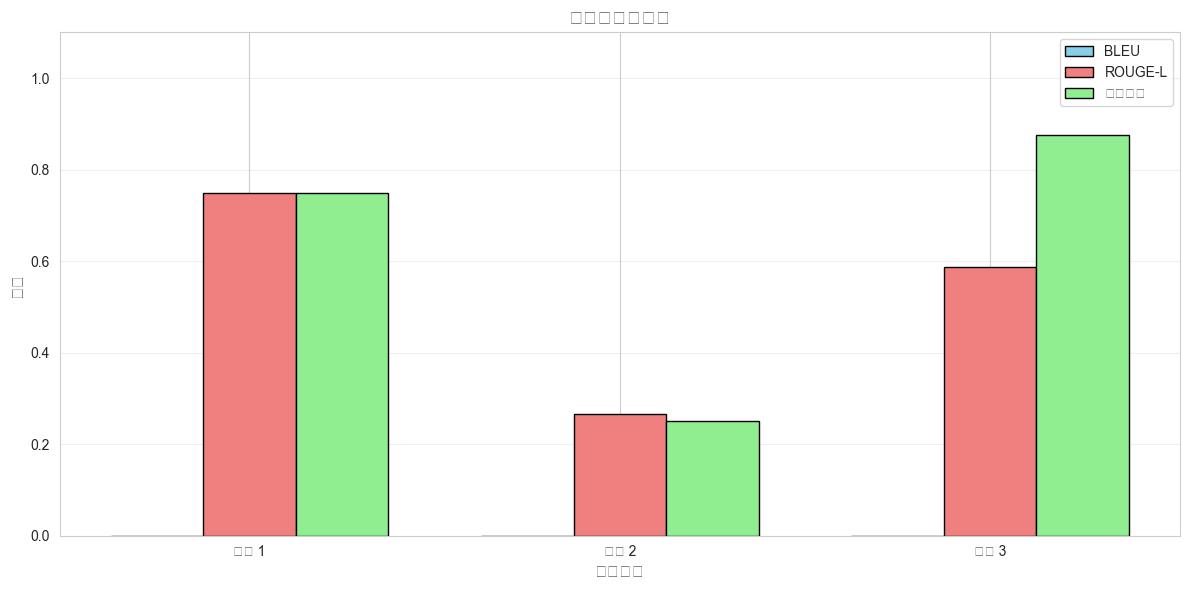


🏆 推薦最佳候選: 候選 1
   平均分數: 50.00%


In [15]:
# 練習 2: 多指標對比評估

def comprehensive_evaluation(reference: str, candidates: List[str]) -> None:
    """
    對多個候選結果進行綜合評估
    """
    print("\n📊 綜合評估報告\n")
    print("=" * 80)
    print(f"\n參考文本: {reference}\n")
    
    results = []
    
    for i, candidate in enumerate(candidates, 1):
        bleu = calculate_bleu_score(reference, candidate)
        rouge = calculate_rouge_l(reference, candidate)
        
        # 計算詞重疊率
        ref_words = set(reference.split())
        cand_words = set(candidate.split())
        overlap = len(ref_words & cand_words) / len(ref_words) if ref_words else 0
        
        results.append({
            'candidate': candidate,
            'bleu': bleu,
            'rouge': rouge,
            'overlap': overlap
        })
        
        print(f"候選 {i}: {candidate}")
        print(f"  BLEU:   {bleu:.2%}")
        print(f"  ROUGE:  {rouge:.2%}")
        print(f"  詞重疊: {overlap:.2%}")
        print("-" * 80)
    
    # 視覺化對比
    fig, ax = plt.subplots(figsize=(12, 6))
    
    x = np.arange(len(candidates))
    width = 0.25
    
    bleu_scores = [r['bleu'] for r in results]
    rouge_scores = [r['rouge'] for r in results]
    overlap_scores = [r['overlap'] for r in results]
    
    ax.bar(x - width, bleu_scores, width, label='BLEU', color='skyblue', edgecolor='black')
    ax.bar(x, rouge_scores, width, label='ROUGE-L', color='lightcoral', edgecolor='black')
    ax.bar(x + width, overlap_scores, width, label='詞重疊率', color='lightgreen', edgecolor='black')
    
    ax.set_xlabel('候選文本', fontsize=12)
    ax.set_ylabel('分數', fontsize=12)
    ax.set_title('多指標評估對比', fontsize=14, fontweight='bold')
    ax.set_xticks(x)
    ax.set_xticklabels([f'候選 {i+1}' for i in range(len(candidates))])
    ax.legend()
    ax.set_ylim(0, 1.1)
    ax.grid(axis='y', alpha=0.3)
    
    plt.tight_layout()
    plt.show()
    
    # 推薦最佳候選
    avg_scores = [(r['bleu'] + r['rouge'] + r['overlap']) / 3 for r in results]
    best_idx = np.argmax(avg_scores)
    
    print(f"\n🏆 推薦最佳候選: 候選 {best_idx + 1}")
    print(f"   平均分數: {avg_scores[best_idx]:.2%}")

# 測試
reference = "蘋果 公司 發布 新 iPhone 搭載 先進 晶片"
candidates = [
    "蘋果 公司 推出 新 iPhone 使用 先進 晶片",
    "蘋果 發表 最新 iPhone 配備 強大 處理器",
    "新 iPhone 由 蘋果 公司 發布 並 搭載 晶片"
]

comprehensive_evaluation(reference, candidates)

---

## 📚 本課總結

### 核心要點回顧:

1. **四大核心任務:**
   - 序列標註: 為每個詞分配標籤 (NER, POS)
   - 文本分類: 將文本分配到類別 (情感分析, 主題分類)
   - 序列到序列: 輸入輸出都是序列 (翻譯, 摘要)
   - 問答系統: 根據問題生成答案 (抽取式, 生成式)

2. **統一建模框架:**
   - 所有任務本質上都是序列建模問題
   - P(Y | X) = ∏ P(y_i | y_<i, X)
   - 差異在於輸入輸出的格式與約束

3. **BERT vs GPT:**
   - BERT: 雙向編碼器,適合理解任務
   - GPT: 單向解碼器,適合生成任務
   - T5: 統一的 Text-to-Text 框架

4. **評估指標:**
   - 分類任務: Precision, Recall, F1
   - 生成任務: BLEU (翻譯), ROUGE (摘要)
   - 問答任務: EM (精確匹配), F1

---

## 🎯 下節預告

**CH02-04: Python NLP 工具生態**

我們將探討:
- Hugging Face Transformers 完整教學
- spaCy, NLTK, jieba 工具對比
- 預訓練模型選擇與微調
- 實戰: 構建端到端 NLP 應用

---

## 📖 延伸閱讀

1. **論文:**
   - [BERT](https://arxiv.org/abs/1810.04805): Pre-training of Deep Bidirectional Transformers
   - [GPT-3](https://arxiv.org/abs/2005.14165): Language Models are Few-Shot Learners
   - [T5](https://arxiv.org/abs/1910.10683): Exploring Transfer Learning with Text-to-Text Transformer

2. **數據集:**
   - [GLUE Benchmark](https://gluebenchmark.com/): 通用語言理解評測
   - [SQuAD](https://rajpurkar.github.io/SQuAD-explorer/): 閱讀理解數據集
   - [CLUE](https://www.cluebenchmarks.com/): 中文語言理解評測

3. **工具資源:**
   - [Hugging Face Hub](https://huggingface.co/models): 預訓練模型庫
   - [Papers With Code](https://paperswithcode.com/area/natural-language-processing): NLP 論文與代碼

---

### 🙋 問題討論

有任何問題嗎?歡迎在討論區提問!

---

**課程資訊:**
- **作者:** iSpan NLP Team
- **版本:** v1.0
- **最後更新:** 2025-10-17
- **授權:** MIT License (僅供教學使用)
- **參考講義:** [03_NLP核心任務與應用.md](../講義/03_NLP核心任務與應用.md)